### Write a program that inputs a list of numbers and returns the cumulative sum that is, a new list where the (i+1)th element is the sum of the first i elements from the original list. For example, the cumulative sum of [1, 2, 3] is [1, 3, 6]

# Method 1
Deducing subsets and then calculating their sum

In [1]:
def method_1_1(orig:list[int]) -> list[int]:
    new = []

    for i in range(len(orig)):
        sublist = orig[:i+1]
        total   = 0
        for j in sublist:
            total += j
        new.append(total)
    
    return new

inp = input('Enter some numbers (seperated by spaces): ')
lis = [int(i) for i in inp.split()]
print(method_1_1(lis))

Enter some numbers (seperated by spaces):  5 4 1 6 7 0


[5, 9, 10, 16, 23, 23]


<br>

In [2]:
def method_1_2(orig:list[int]) -> list[int]:
    new = []

    for i in range(len(orig)):
        new.append(sum(orig[:i+1]))
    
    return new

inp = input('Enter some numbers (seperated by spaces): ')
lis = [int(i) for i in inp.split()]
print(method_1_2(lis))

Enter some numbers (seperated by spaces):  5 4 1 6 7 0


[5, 9, 10, 16, 23, 23]


<br>

In [3]:
def method_1_3(orig:list[int]) -> list[int]:
    return [sum(orig[:i+1]) for i in range(len(orig))]

inp = input('Enter some numbers (seperated by spaces): ')
lis = [int(i) for i in inp.split()]
print(method_1_3(lis))

Enter some numbers (seperated by spaces):  5 4 1 6 7 0


[5, 9, 10, 16, 23, 23]


<br><br><br><br><br>

# Method 2
Looping through list and keep adding its elements to `total`

In [4]:
def method_2_1(orig:list[int]) -> list[int]:
    new = []

    total = 0
    for i in orig:
        total += i
        new.append(total)
    
    return new

inp = input('Enter some numbers (seperated by spaces): ')
lis = [int(i) for i in inp.split()]
print(method_2_1(lis))

Enter some numbers (seperated by spaces):  5 4 1 6 7 0


[5, 9, 10, 16, 23, 23]


<br>

In [5]:
def method_2_2(orig:list[int]) -> list[int]:
    total = 0
    return [total := total + i for i in orig]

inp = input('Enter some numbers (seperated by spaces): ')
lis = [int(i) for i in inp.split()]
print(method_2_2(lis))

Enter some numbers (seperated by spaces):  5 4 1 6 7 0


[5, 9, 10, 16, 23, 23]


<br><br><br><br><br>

# Measuring performance

In [6]:
!pip install matplotlib tqdm

  0%|          | 0/5 [00:00<?, ?it/s]

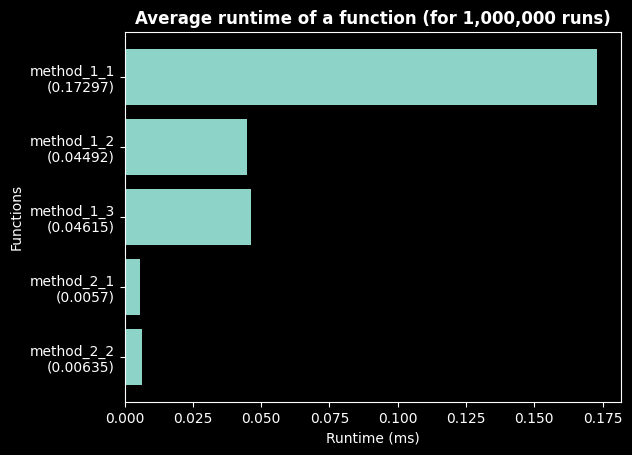

In [7]:
from timeit import timeit
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
plt.style.use('https://raw.githubusercontent.com/msr8/ml-projects/main/dark-style.mplstyle')

# Defining some test cases 
test_cases = (
    [],
    [0],
    [1e15],
    [6,3,1,2,4,5],
    [503149456575707, 698190489612148, 262893250928604, 985693658244293, 364476413630717, 315322894666451, 292126514133492, 874664968170142, 322712291159343, 521874145074084, 833380799698255, 773124210043604, 34661640333613, 575944562284168, 144283476465546, 671745438905059, 652599455691104, 336162157170910, 484337474145459, 806846215192169, 575437151523392, 935704724135717, 427587999182304, 386337989260336, 743258853037425, 30813046494702, 594263893099356, 612718005149846, 417718224335653, 692264032548908, 722430656854243, 658789827504406, 767317170907344, 633902191010845, 957813117789863, 430505225258070, 98218729467978, 241691867462677, 350487104979477, 50458116984532, 240064153342101, 192212248872267, 846097171645015, 714544756359176, 529484344328201, 217514101102462, 120577680407660, 110311737582538, 739840361796381, 677697689001483, 585937666418406, 99741531009288, 134240628783121, 368181442705016, 457236808984299, 527943112292478, 24632196996650]
)
N_ITERS = int(1e6) # How many times to run a function
funcs = ['method_1_1', 'method_1_2', 'method_1_3', 'method_2_1', 'method_2_2']

# Finding runtimes
times = {}
for func_name in tqdm(funcs):
    time_used        = timeit(f'for i in test_cases: {func_name}(i)', setup=f'from __main__ import test_cases,{func_name}', number=N_ITERS)
    avg_time         = time_used / N_ITERS * 1000 # Did 1000 to convert it to ms
    times[func_name] = avg_time

# Plotting our findings
plt.title(f'Average runtime of a function (for {N_ITERS:,} runs)')
plt.xlabel('Runtime (ms)')
plt.ylabel('Functions')
plt.barh(
    [f'{k}\n({round(v,5)})' for  k,v in list(times.items())[::-1]],
    list(times.values())[::-1],
)
plt.show()


<br><br><br><br><br>